<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Province-Data" data-toc-modified-id="Province-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Province Data</a></span></li><li><span><a href="#Italy-Map" data-toc-modified-id="Italy-Map-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Italy Map</a></span></li><li><span><a href="#Lombardia,-ER-and-Veneto" data-toc-modified-id="Lombardia,-ER-and-Veneto-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Lombardia, ER and Veneto</a></span><ul class="toc-item"><li><span><a href="#Trend" data-toc-modified-id="Trend-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Trend</a></span></li><li><span><a href="#Growth-Rates" data-toc-modified-id="Growth-Rates-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Growth Rates</a></span></li></ul></li><li><span><a href="#Cities-(Lombardia,-ER-and-Veneto)" data-toc-modified-id="Cities-(Lombardia,-ER-and-Veneto)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cities (Lombardia, ER and Veneto)</a></span><ul class="toc-item"><li><span><a href="#Trend" data-toc-modified-id="Trend-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Trend</a></span></li><li><span><a href="#Growth-Rates" data-toc-modified-id="Growth-Rates-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Growth Rates</a></span></li></ul></li></ul></div>

In [1]:
import os
import sys
import seaborn as sns
from datetime import date, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

code = os.path.abspath(os.path.join('..'))
if code not in sys.path:
    sys.path.append(code)
    
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")
    
# DATA --> https://github.com/pcm-dpc/COVID-19

In [2]:
from src.dataclass.coviddata import ItalianCovidData
REGIONS = ['Lombardia', 'Emilia-Romagna', 'Veneto']

from src.config import (
    CITIES_LOMBARDIA,
    CITIES_EMILIA,
    CITIES_VENETO,
    CITIES_CAMPANIA
)
WINDOWS = (3,7,15)

# Province Data

In [3]:
covid_data_it = ItalianCovidData()

In [4]:
covid_data_it.data_summary()

--- Latest Update: 2020-05-05 ---


 --- REGIONS DATASET --- 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491 entries, 0 to 1490
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   data                        1491 non-null   datetime64[ns]
 1   stato                       1491 non-null   object        
 2   codice_regione              1491 non-null   int64         
 3   denominazione_regione       1491 non-null   object        
 4   lat                         1491 non-null   float64       
 5   long                        1491 non-null   float64       
 6   ricoverati_con_sintomi      1491 non-null   int64         
 7   terapia_intensiva           1491 non-null   int64         
 8   totale_ospedalizzati        1491 non-null   int64         
 9   isolamento_domiciliare      1491 non-null   int64         
 10  totale_positivi             1491 non-null   int64        

# Italy Map

In [47]:
np.mean(list(covid_data_it.cities_data_today['growth_factor'][~np.isinf(covid_data_it.cities_data_today['growth_factor'])]))

0.49084672422781683

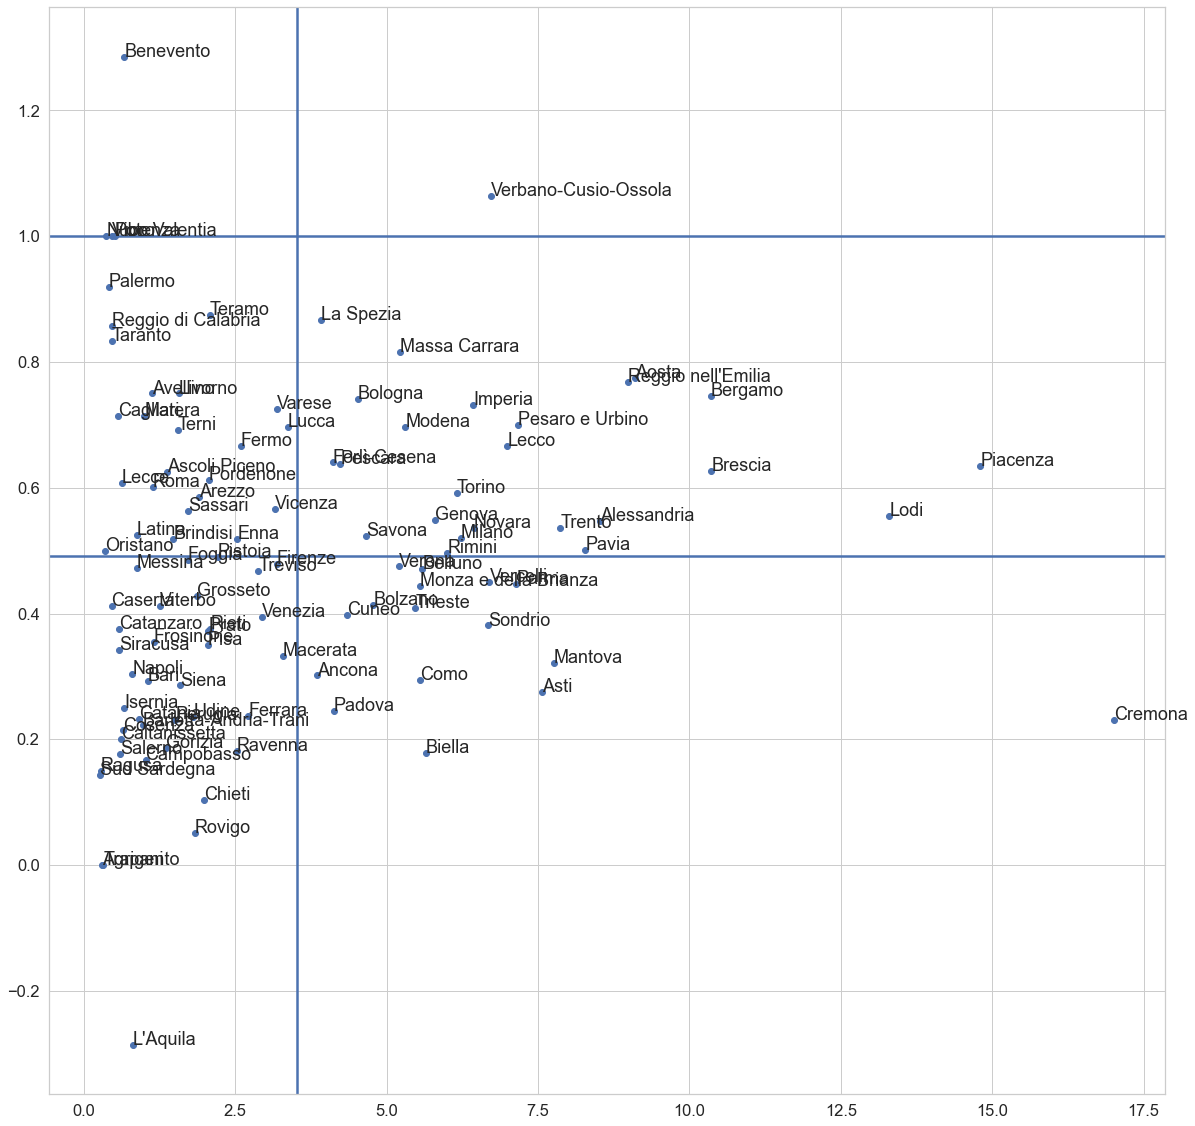

In [49]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(covid_data_it.cities_data_today['incidence'],
         covid_data_it.cities_data_today['growth_factor'])
ax.axhline(np.mean(list(covid_data_it.cities_data_today['growth_factor'][~np.isinf(covid_data_it.cities_data_today['growth_factor'])])))
ax.axhline(1)
ax.axvline(np.mean(list(covid_data_it.cities_data_today['incidence'])))

for i, txt in enumerate(list(covid_data_it.cities_data_today['Provincia'])):
    ax.annotate(txt, (covid_data_it.cities_data_today['incidence'][i], covid_data_it.cities_data_today['growth_factor'][i]))

In [6]:
covid_data_it.cities_data_json['denominazione_provincia']

0         Chieti
1       L'Aquila
2        Pescara
3         Teramo
5         Matera
          ...   
9082      Rovigo
9083     Treviso
9084     Venezia
9085      Verona
9086     Vicenza
Name: denominazione_provincia, Length: 7597, dtype: object

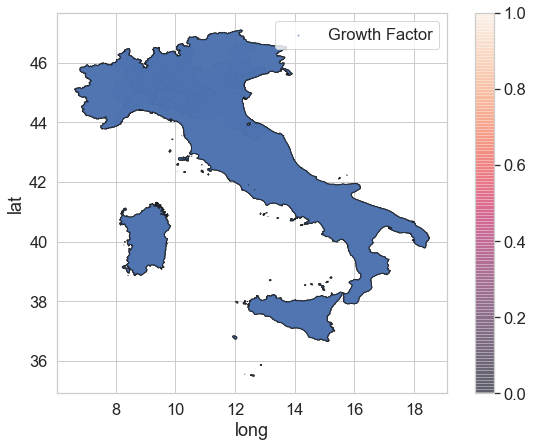

In [6]:
target_date = (date.today() - timedelta(days=1)).strftime('%Y-%m-%d')
covid_data_it.show_map_cases(current_date=target_date)

# Lombardia, ER and Veneto

## Trend

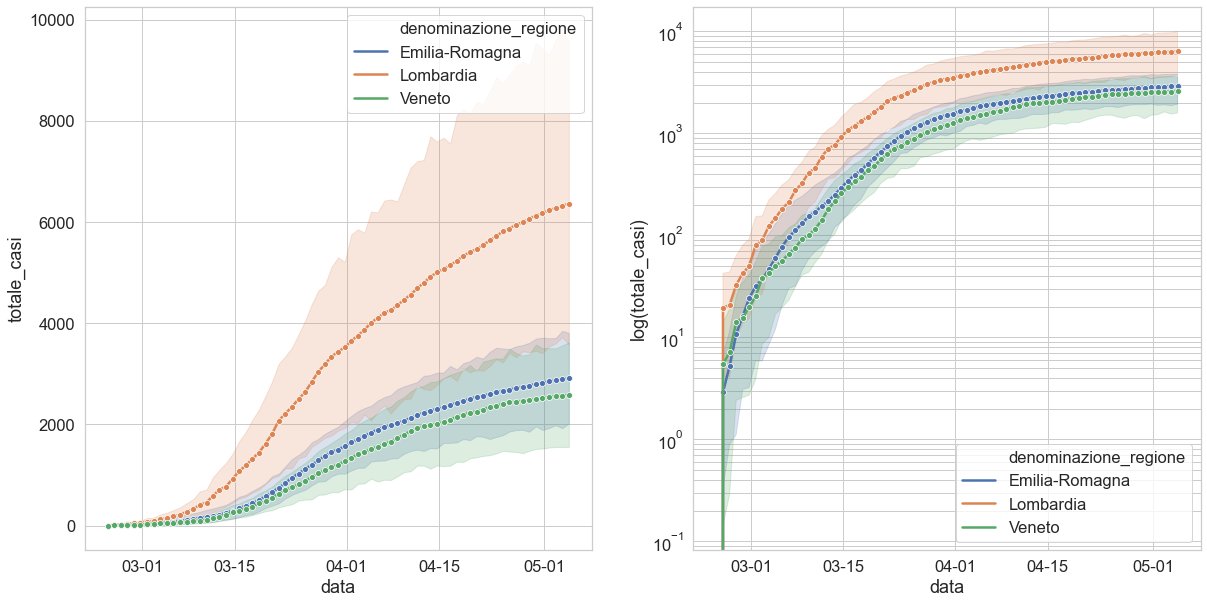

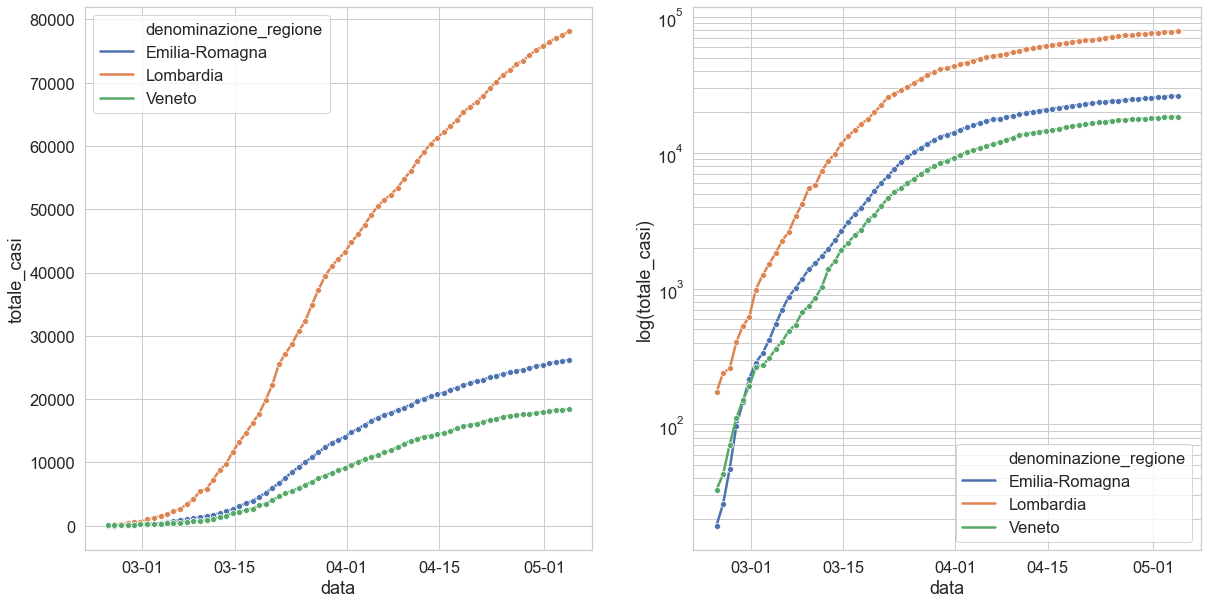

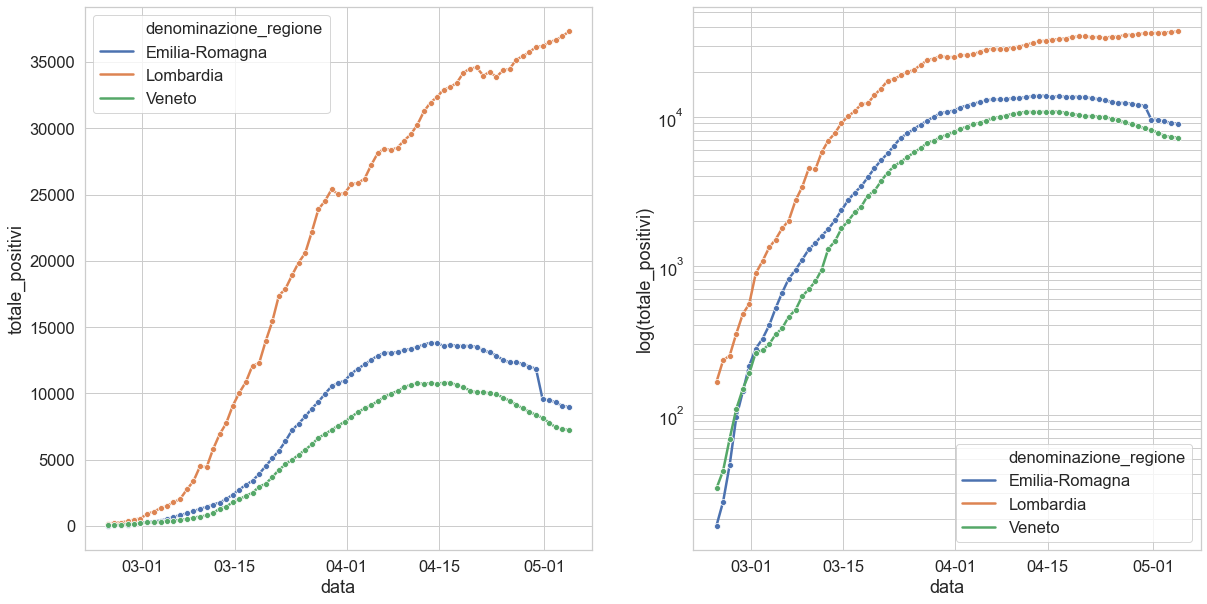

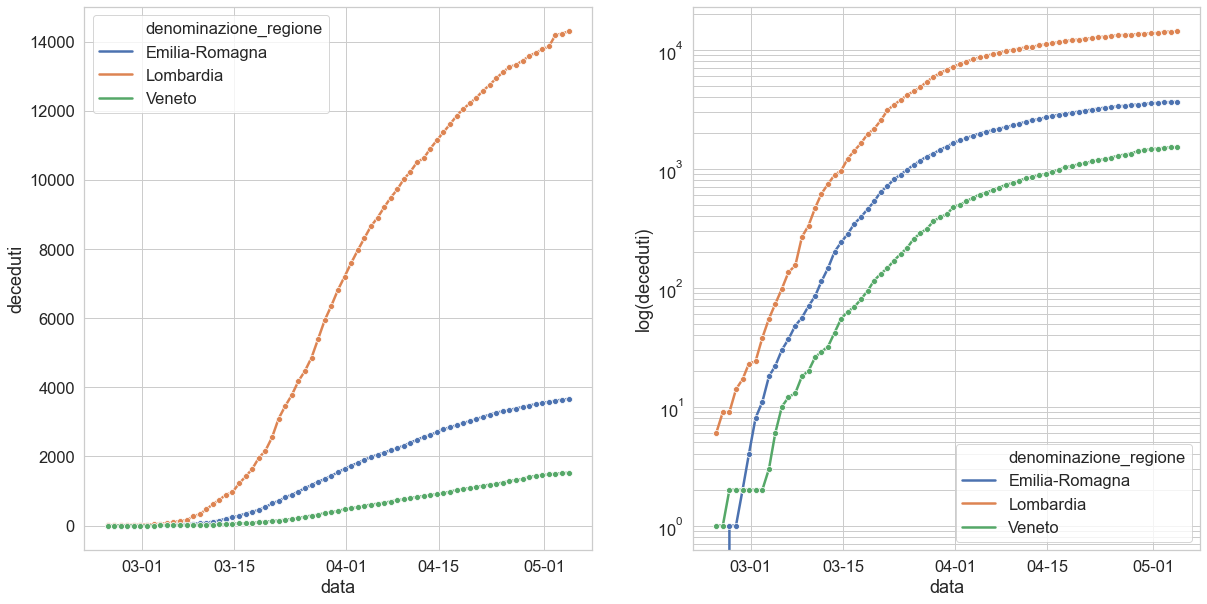

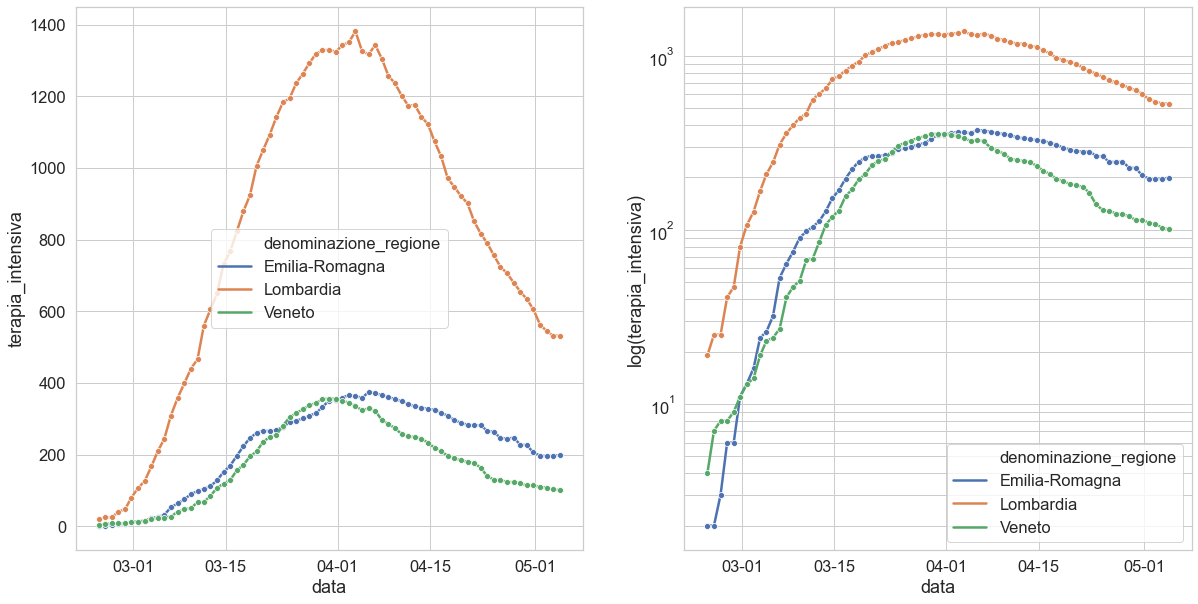

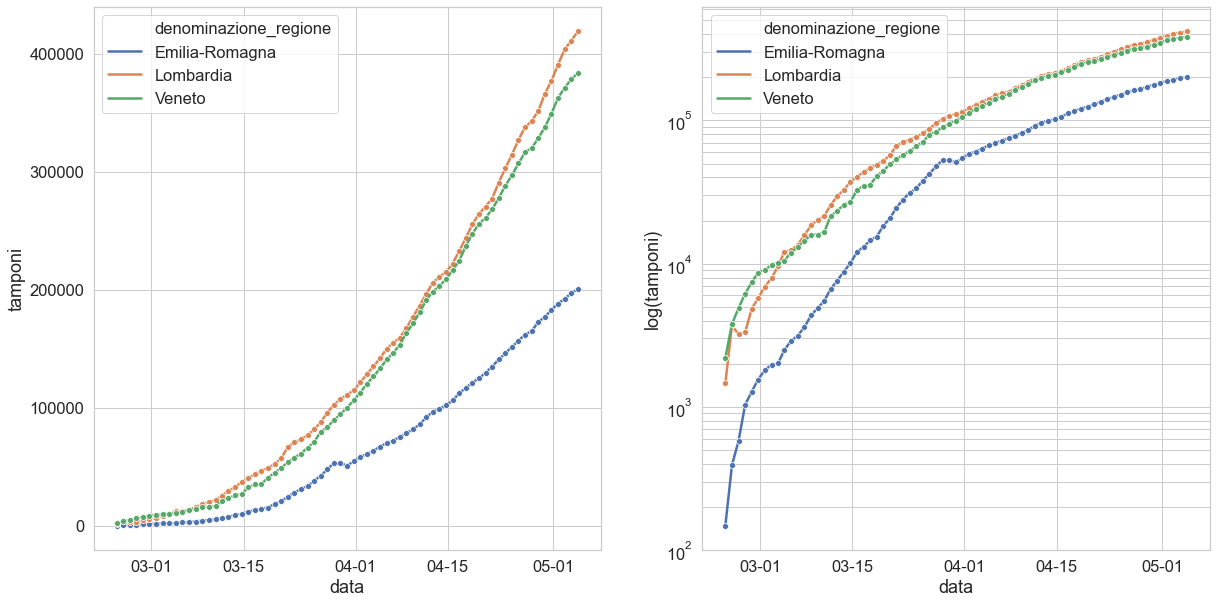

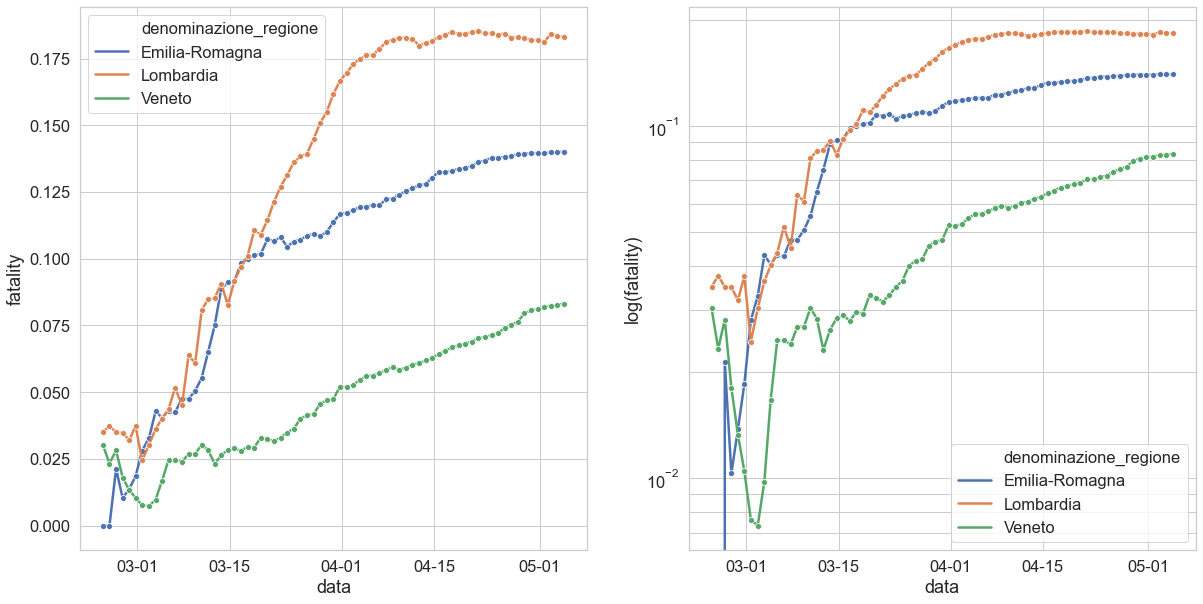

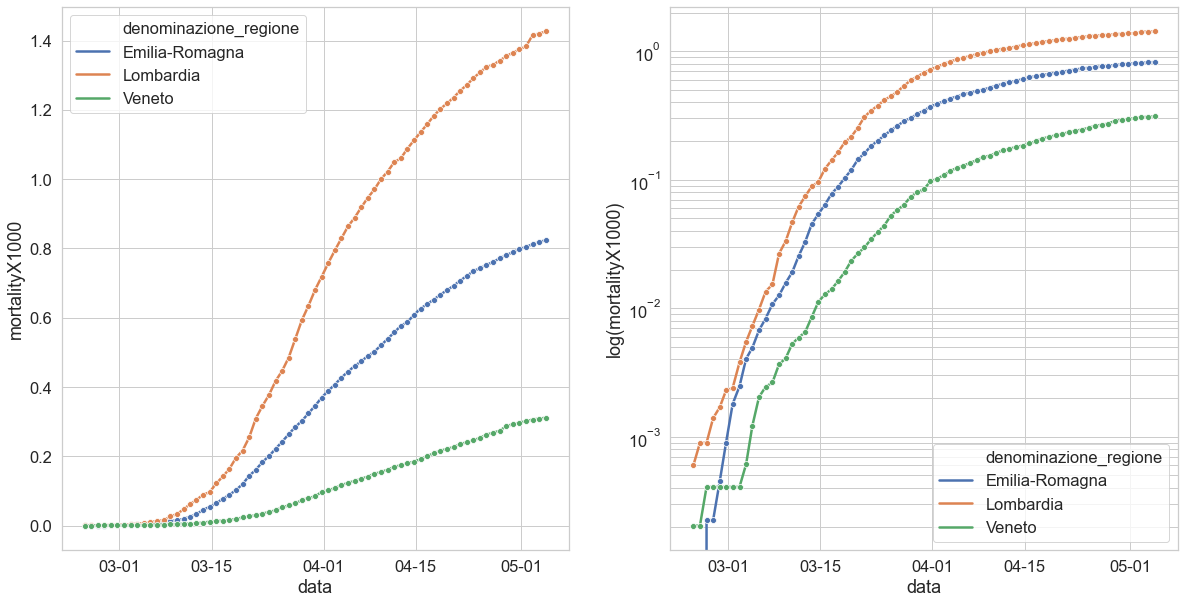

In [20]:
covid_data_it.plot_region_indicators(regions_area=REGIONS)

## Growth Rates

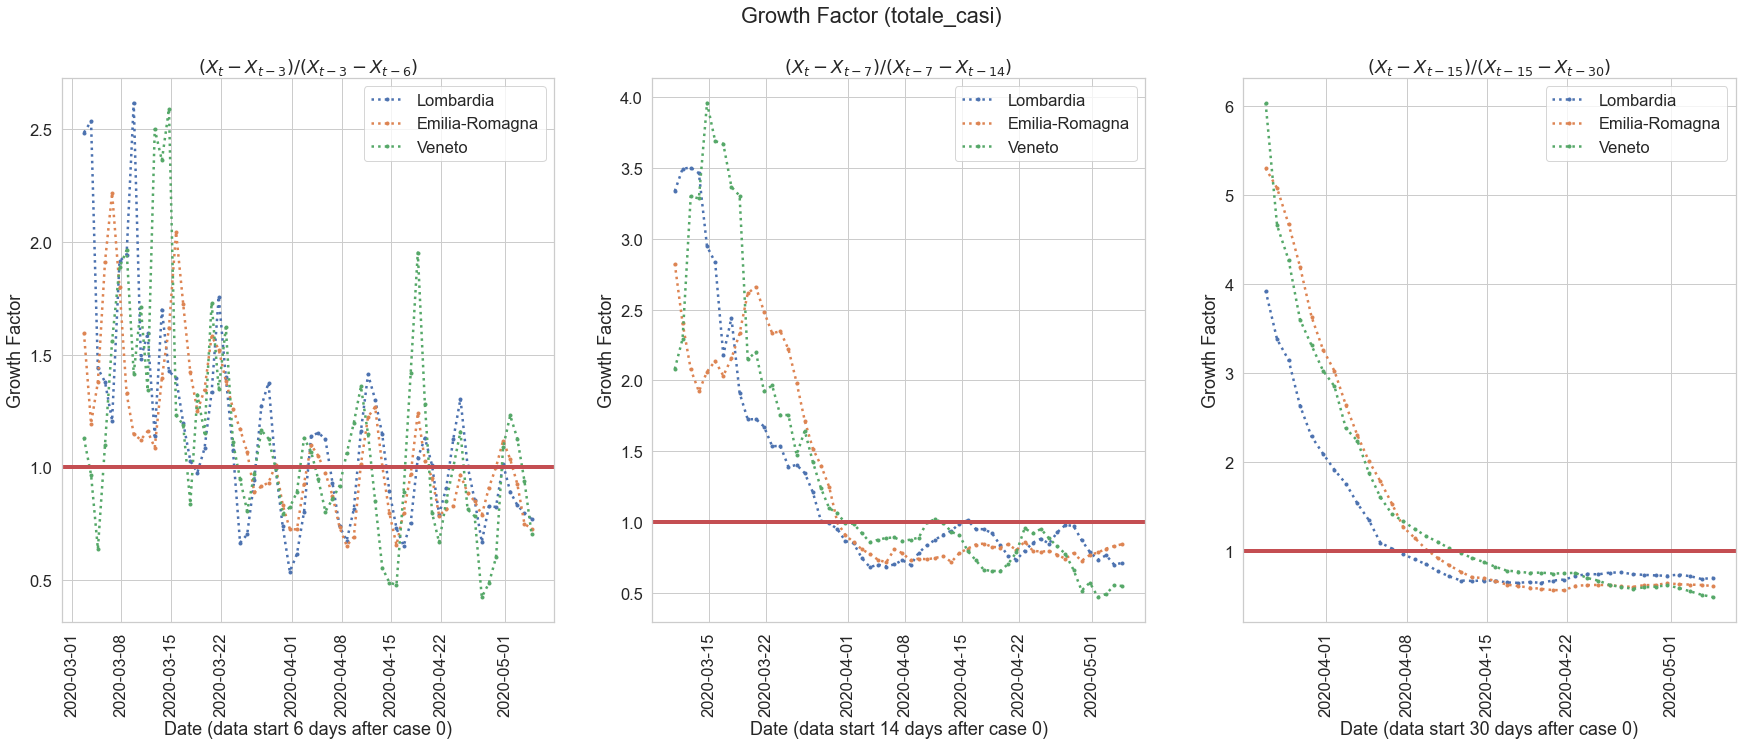

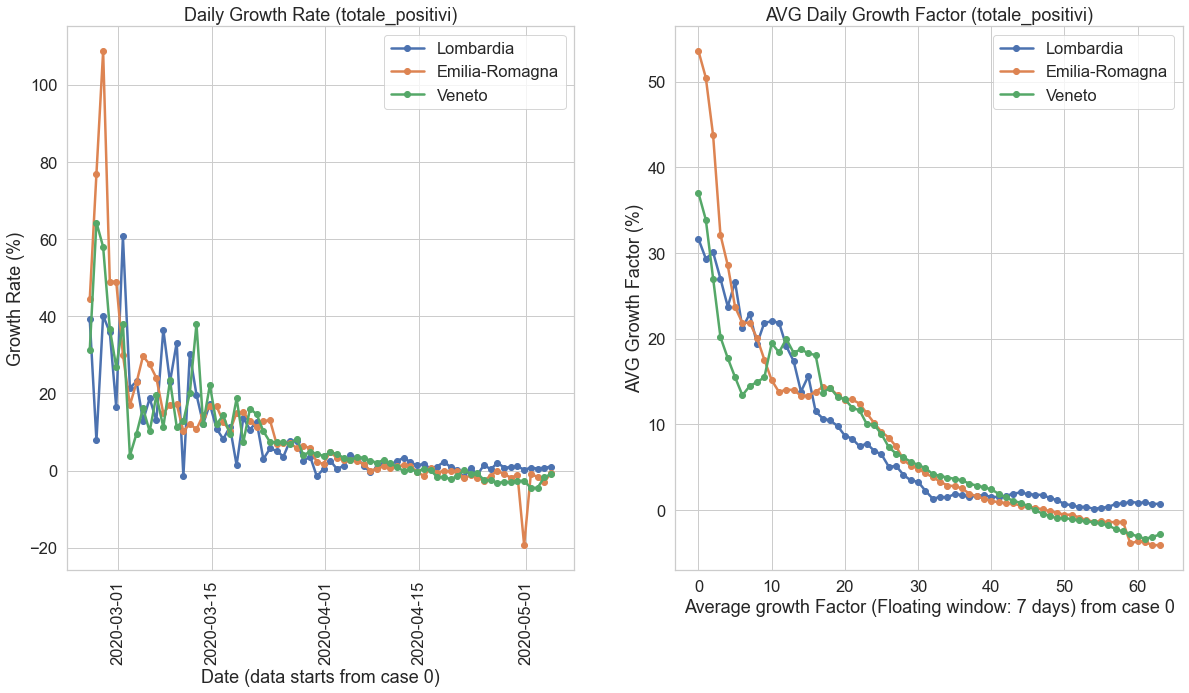

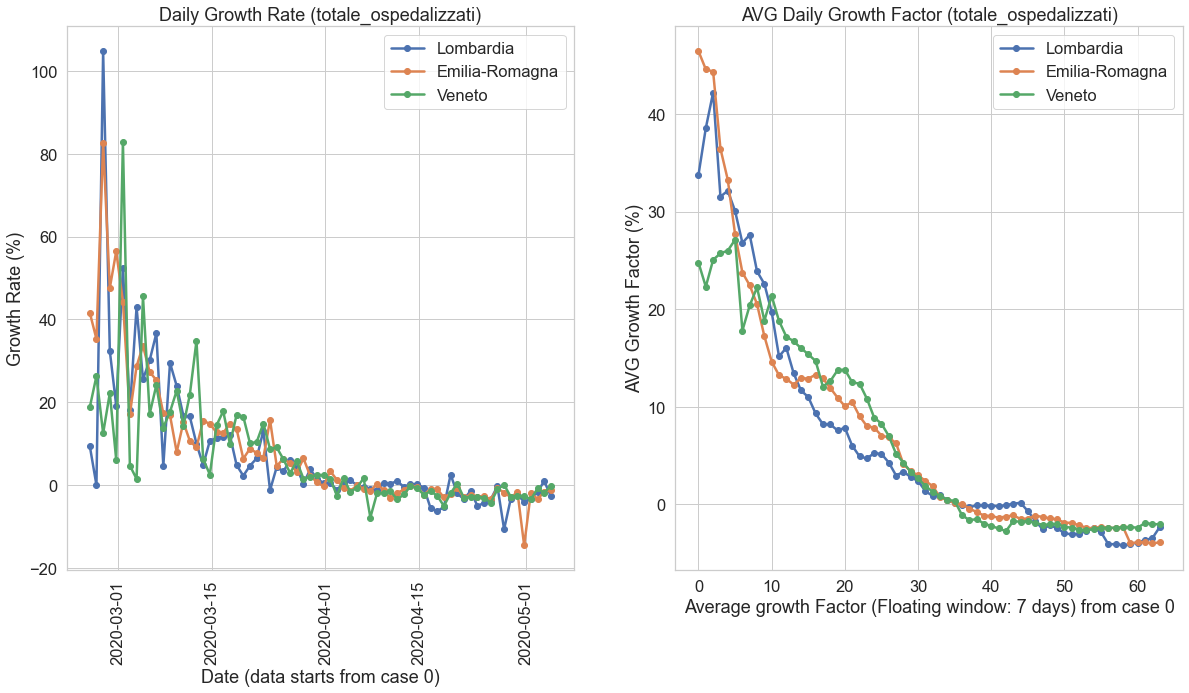

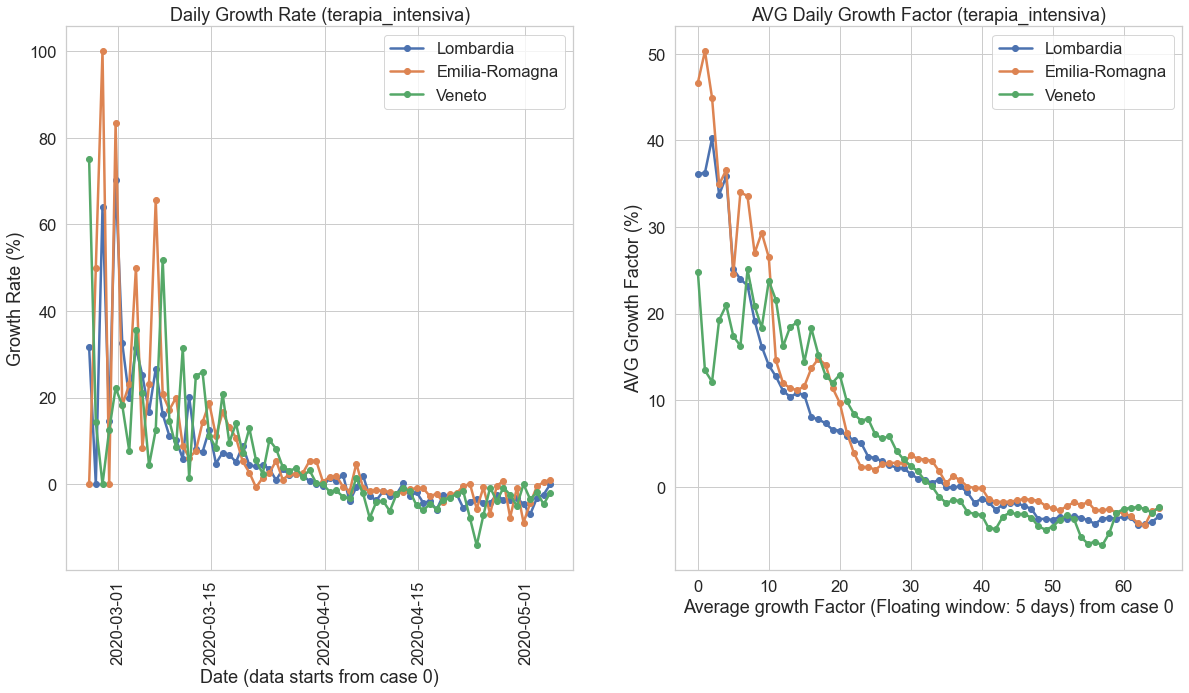

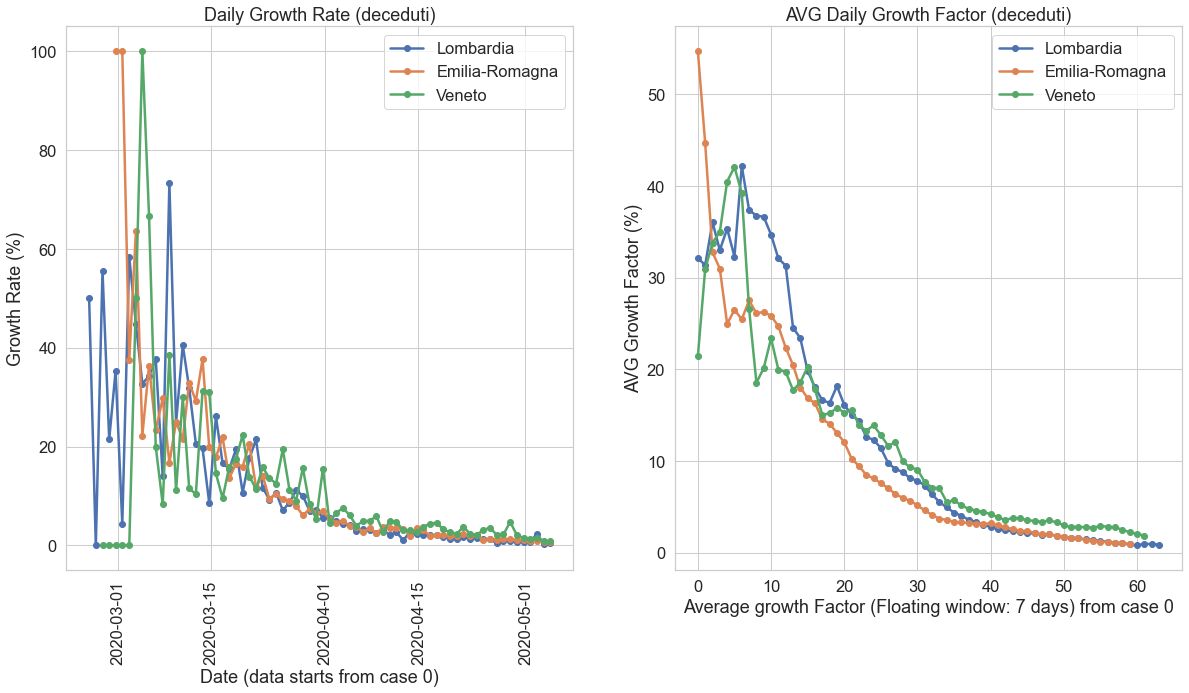

In [21]:
covid_data_it.growth_factors(areas=REGIONS,
                           regions=True,
                           area_target='denominazione_regione',
                           indicator="totale_casi",
                           grw=WINDOWS)
covid_data_it.growth_rates(areas=REGIONS,
                           regions=True,
                           area_target='denominazione_regione',
                           indicator="totale_positivi",
                           grw=7)
covid_data_it.growth_rates(areas=REGIONS,
                           regions=True,
                           area_target='denominazione_regione',
                           indicator="totale_ospedalizzati",
                           grw=7)
covid_data_it.growth_rates(areas=REGIONS,
                           regions=True,
                           area_target='denominazione_regione',
                           indicator='terapia_intensiva',
                           grw=5)
covid_data_it.growth_rates(areas=REGIONS,
                           regions=True,
                           area_target='denominazione_regione',
                           indicator="deceduti",
                           grw=7)

# Cities (Lombardia, ER and Veneto)

## Trend

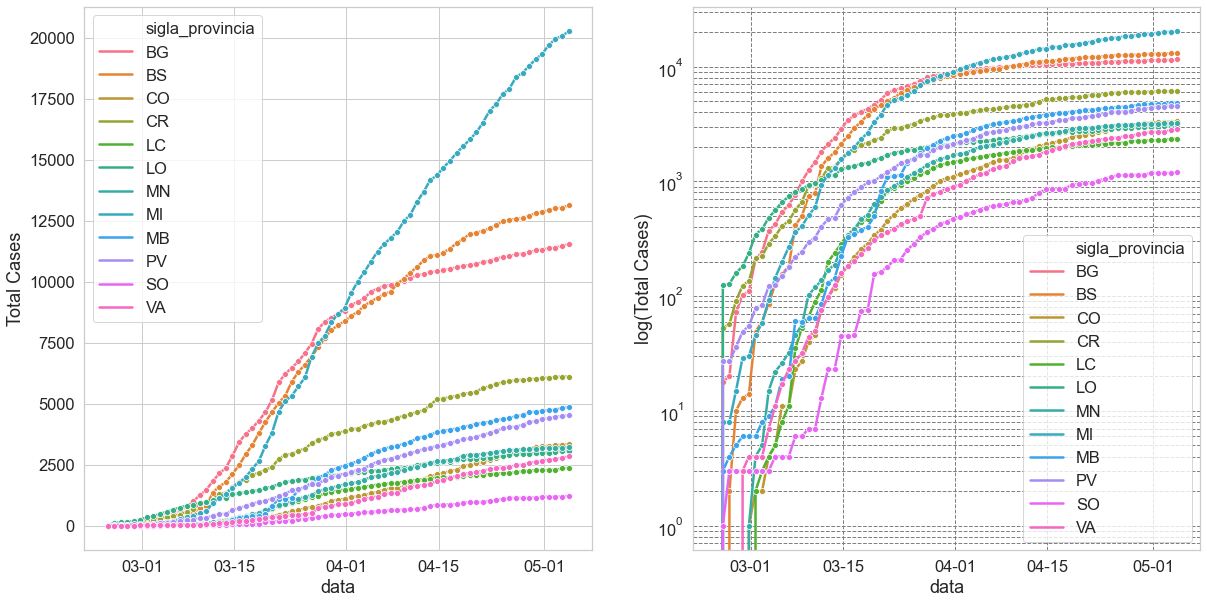

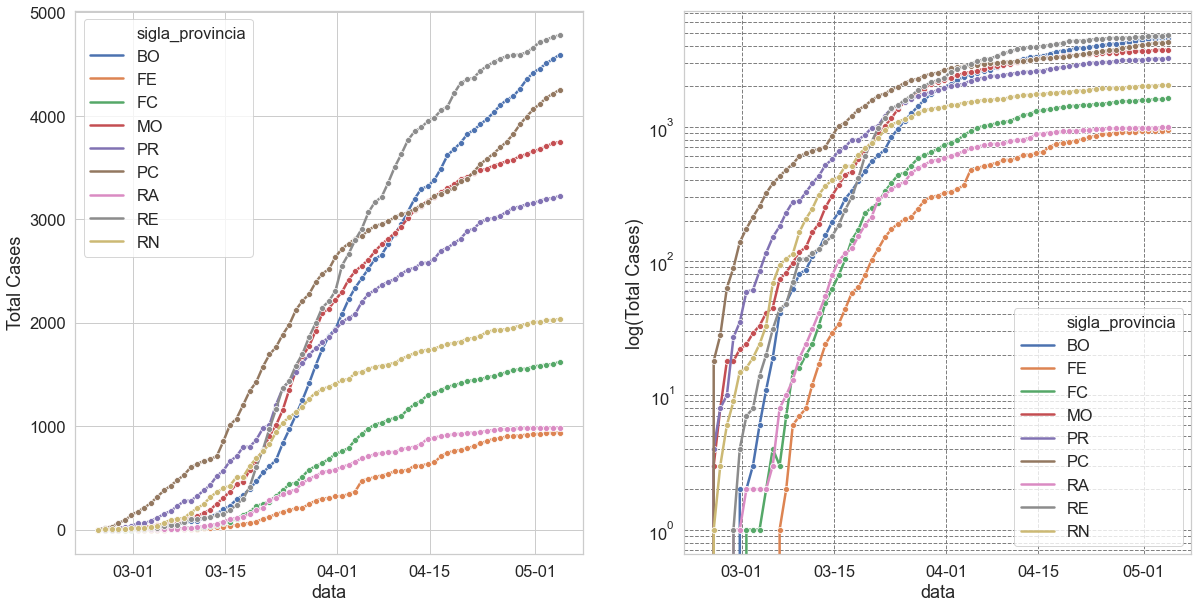

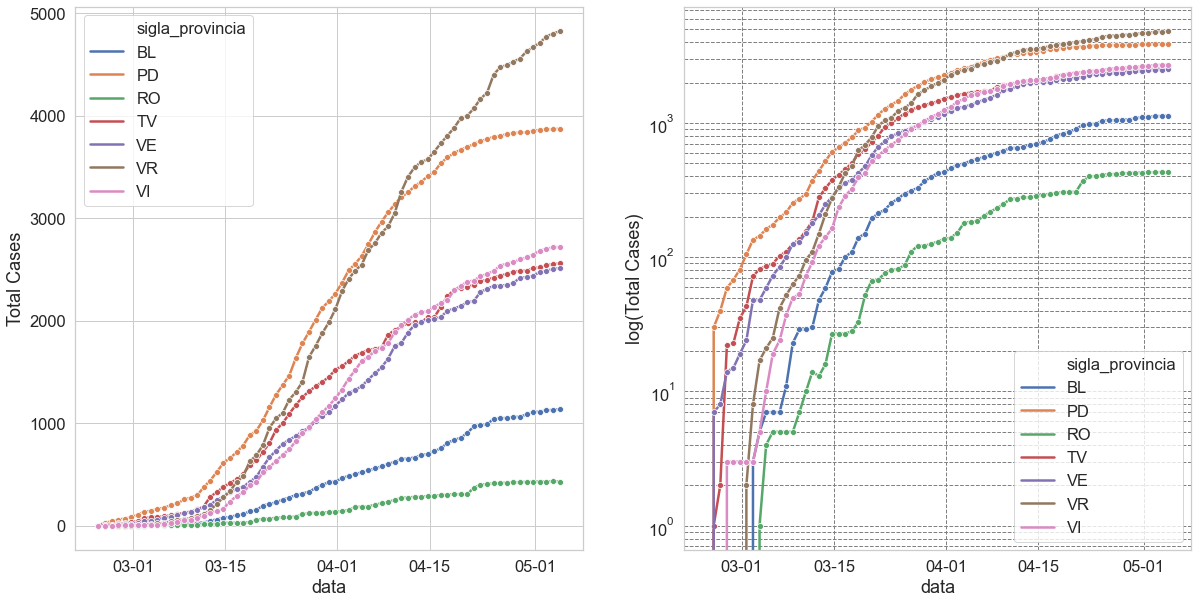

In [22]:
covid_data_it.plot_region("Lombardia")
covid_data_it.plot_region("Emilia-Romagna")
covid_data_it.plot_region("Veneto")

## Growth Rates

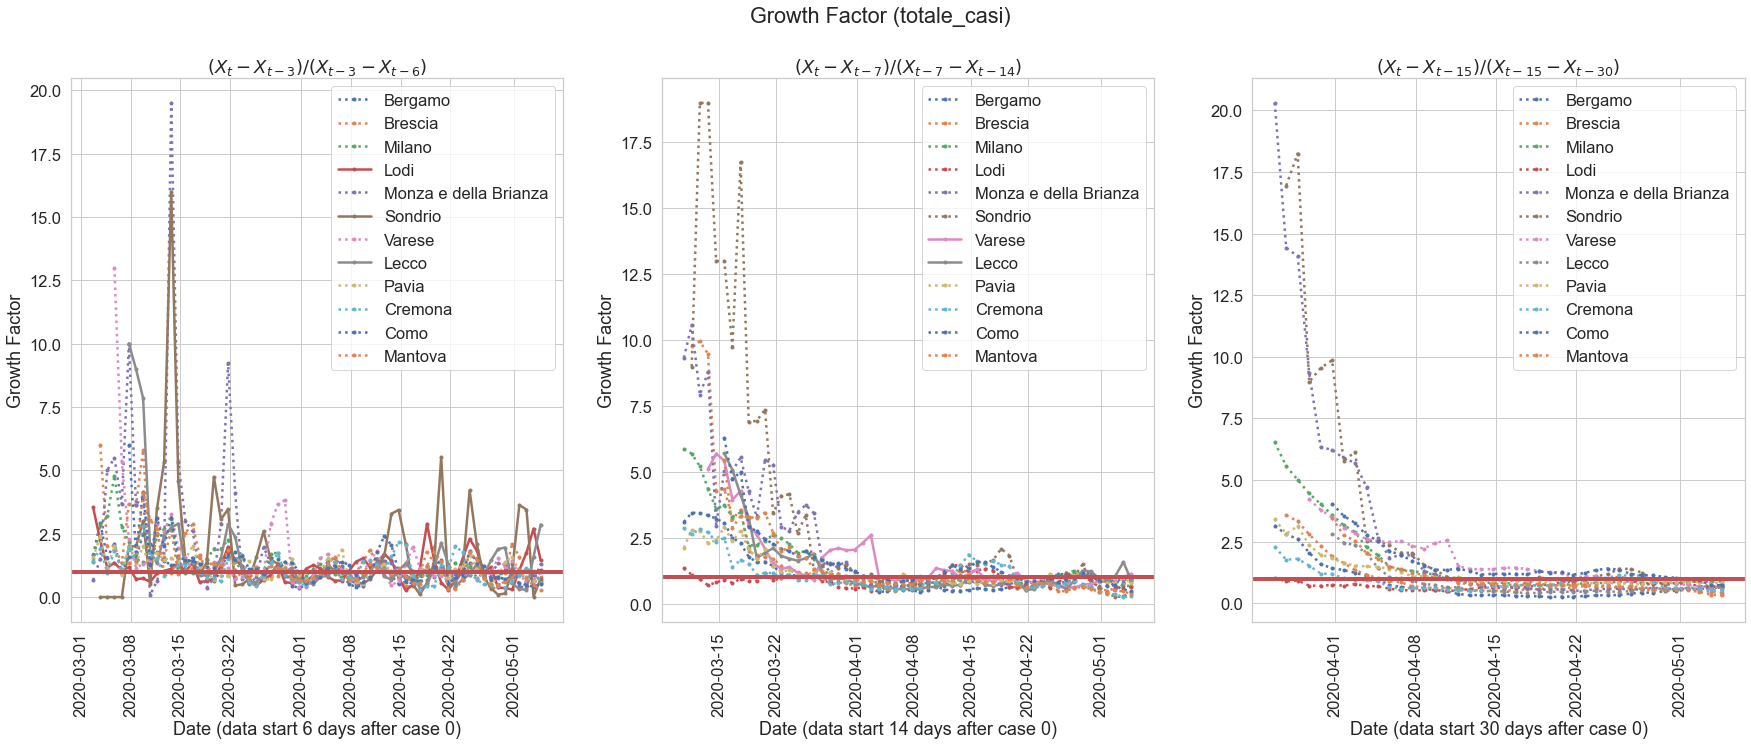

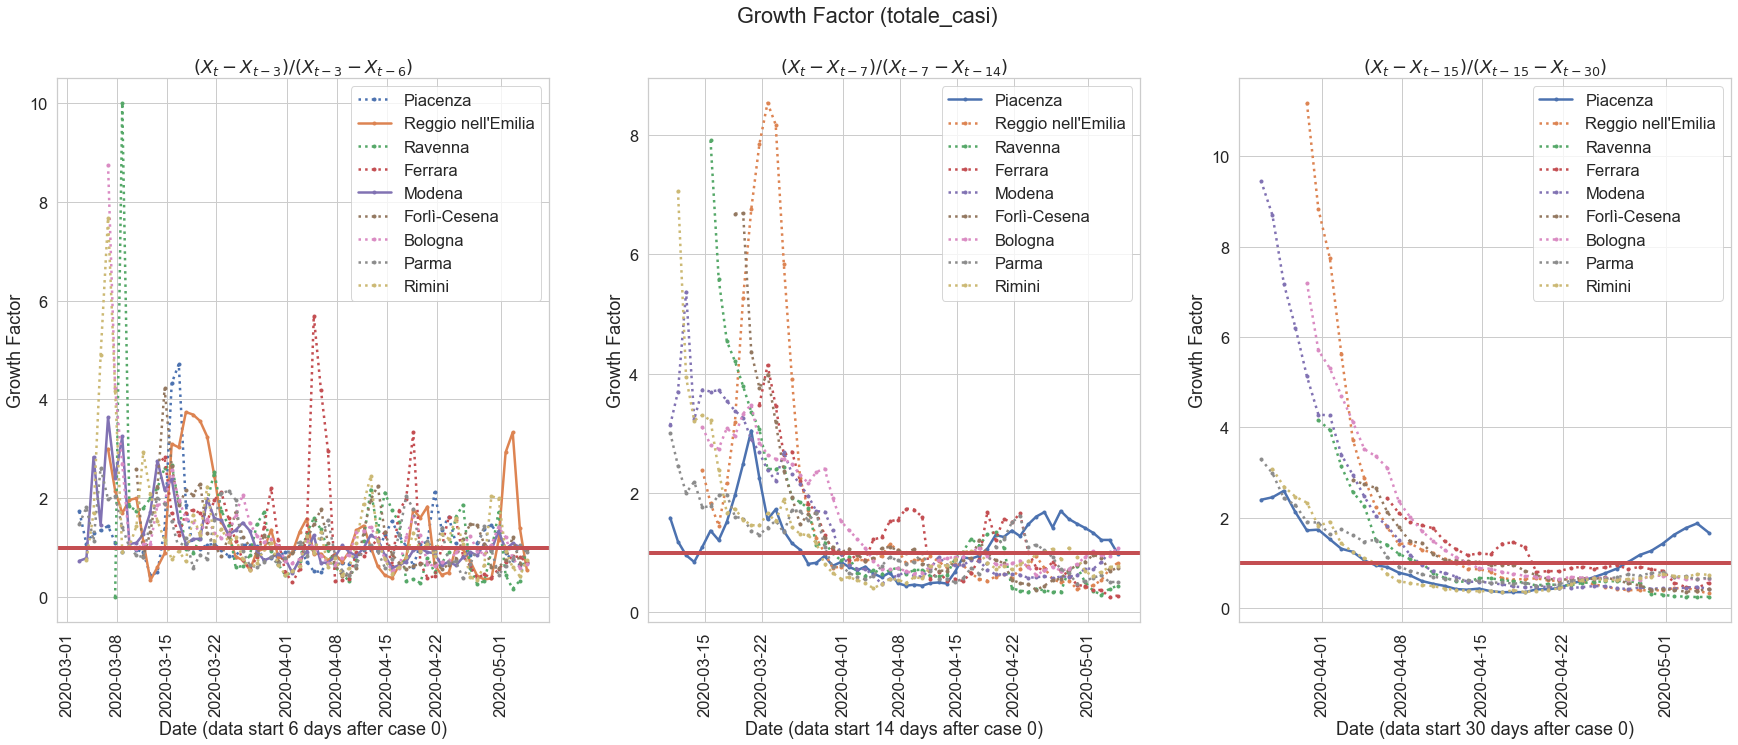

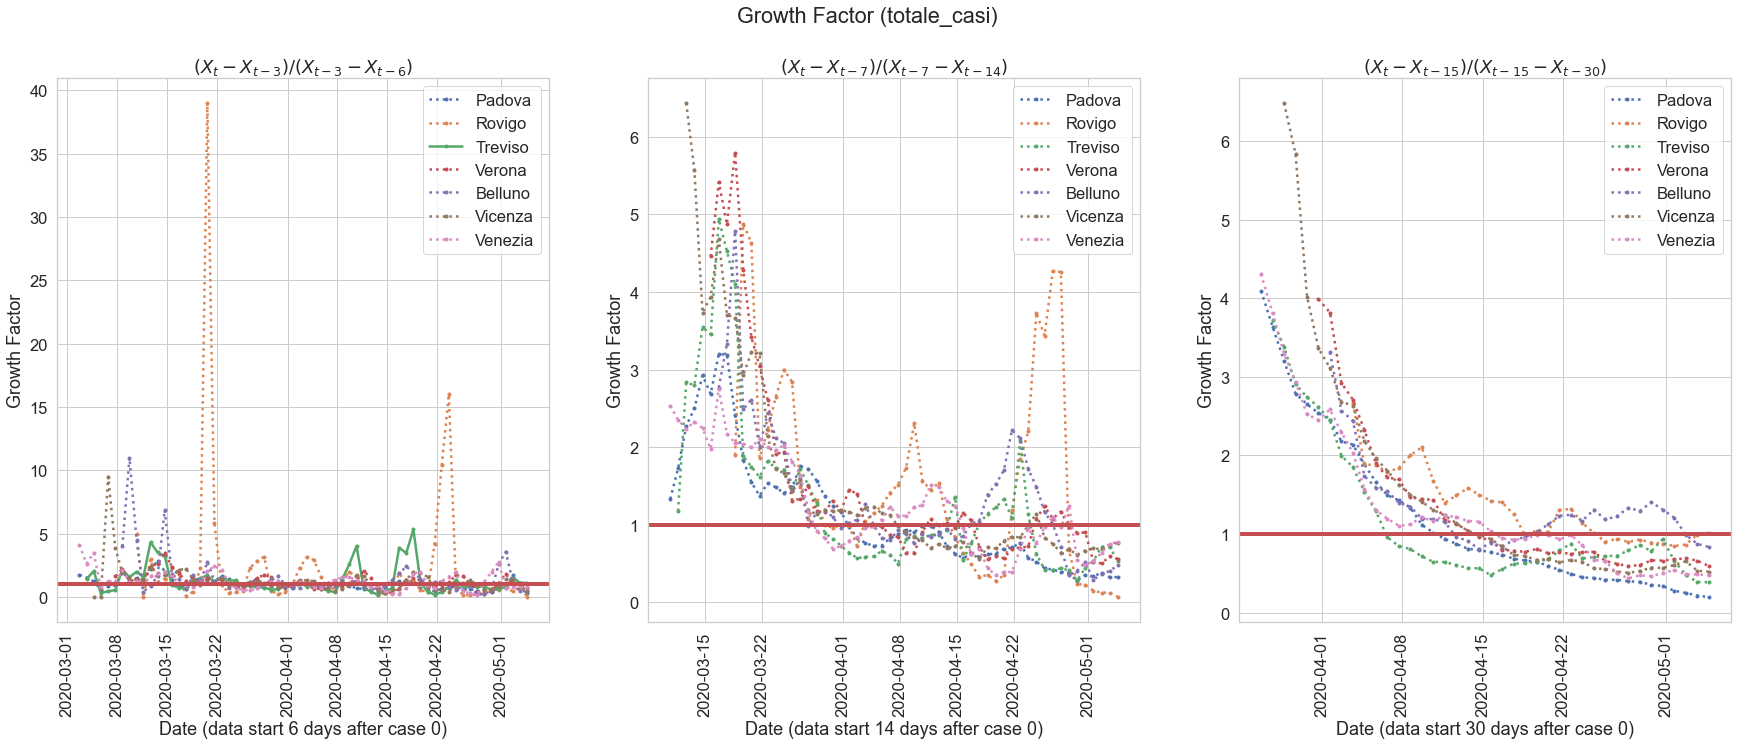

In [23]:
covid_data_it.growth_factors(areas=CITIES_LOMBARDIA,
                           regions=False,
                           area_target='denominazione_provincia',
                           indicator='totale_casi',
                           grw=WINDOWS)
covid_data_it.growth_factors(areas=CITIES_EMILIA,
                           regions=False,
                           area_target='denominazione_provincia',
                           indicator='totale_casi',
                           grw=WINDOWS)
covid_data_it.growth_factors(areas=CITIES_VENETO,
                           regions=False,
                           area_target='denominazione_provincia',
                           indicator='totale_casi',
                           grw=WINDOWS)